In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def processData(path):
    with open(path) as file:
        lines = file.readlines()
        lines = [line.rstrip() for line in lines]

    cols = lines[0].split("\t")
    data = lines[2:]
    
    frame = []
    for i in data:
        row = i.split("\t")
        if len(row) > 11:
            pass
        else:
            frame.append(row)
    messages = pd.DataFrame(frame, columns = cols)
    
    return messages

In [3]:
path = "Ansar1/Ansar1.txt"

messages = processData(path)

In [4]:
messages.head()

,﻿MessageID,ThreadID,ThreadName,MemberID,MemberName,Message,P_Year,P_Month,P_Day,P_Date,ThreadFirstMessageID
0,10001,4029,Would-be Marine Matthew Dear died 'after takin...,1060,al-Turki,http://www.timesonline.co.uk/tol/new...cle6139...,2009,04,22,2009-04-22 00:00:00.000,10001
1,10002,4030,Gunshot kills Marine in Iraq,1060,al-Turki,http://www.honoluluadvertiser.com/ar...9042203...,2009,04,22,2009-04-22 00:00:00.000,10002
2,10004,1197,Latest Coalition Fatalities - Iraq/Afghanistan...,54,ANSAR 007,Iraq Office of the Assistant Secretary of Defe...,2009,04,22,2009-04-22 00:00:00.000,2051
3,10005,4031,Gunmen kill three Russian soldiers in Chechnya,932,Abu Fatima,As'Salaamu alaikum. Because the war is over an...,2009,04,22,2009-04-22 00:00:00.000,10005
4,10006,4032,More Pakistani cities fall into Taliban hand,54,ANSAR 007,More Pakistani cities fall into Taliban hand W...,2009,04,22,2009-04-22 00:00:00.000,10006


In [5]:
threads = messages["ThreadID"].unique()

In [6]:
threadLengths = []

for i in threads:
    threadLengths.append(len(messages[messages["ThreadID"] == i]))

2.622342791069999
1.0


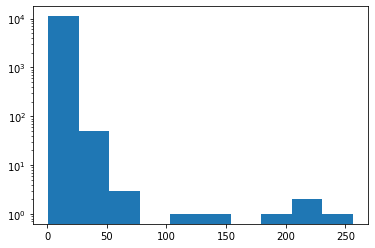

In [7]:
plt.hist(threadLengths)
plt.yscale("log")
print(np.mean(threadLengths))
print(np.median(threadLengths))

In [8]:
#Only want threads with length > 1
replies = messages[messages.duplicated(subset=['ThreadID'], keep=False)]

In [9]:
replyLengths = []
replyThreads = replies["ThreadID"].unique()
for i in threads:
    replyLengths.append(len(replies[replies["ThreadID"] == i]))



4.564588626148134
3.0


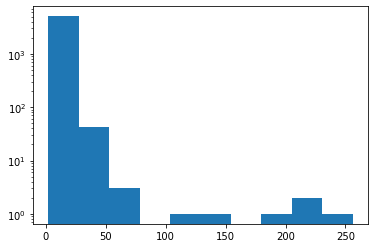

In [10]:
replyLengths = np.array(replyLengths)
replyLengths = replyLengths[replyLengths > 0]
plt.hist(replyLengths)
plt.yscale("log")

print(np.mean(replyLengths))
print(np.median(replyLengths))

In [11]:
replies.head()

,﻿MessageID,ThreadID,ThreadName,MemberID,MemberName,Message,P_Year,P_Month,P_Day,P_Date,ThreadFirstMessageID
2,10004,1197,Latest Coalition Fatalities - Iraq/Afghanistan...,54,ANSAR 007,Iraq Office of the Assistant Secretary of Defe...,2009,04,22,2009-04-22 00:00:00.000,2051
3,10005,4031,Gunmen kill three Russian soldiers in Chechnya,932,Abu Fatima,As'Salaamu alaikum. Because the war is over an...,2009,04,22,2009-04-22 00:00:00.000,10005
4,10006,4032,More Pakistani cities fall into Taliban hand,54,ANSAR 007,More Pakistani cities fall into Taliban hand W...,2009,04,22,2009-04-22 00:00:00.000,10006
5,10007,4031,Gunmen kill three Russian soldiers in Chechnya,54,ANSAR 007,3 soldiers killed in Chechnya despite 'stabili...,2009,04,22,2009-04-22 00:00:00.000,10005
6,10008,4033,Jaish Abu Bakr al-Siddiqq al-Salafi: Bombing C...,12,Insurgent,بسم الله الرحمن الرحيم الحمد لله ناصر المؤمنين...,2009,04,22,2009-04-22 00:00:00.000,10008


In [12]:
members = replies["MemberID"].unique()

In [13]:
connections = []
for i in members:
    length = len(replies["ThreadID"][replies["MemberID"] == i])
    connections.append(length)
    

62.45187165775401
9.0
1


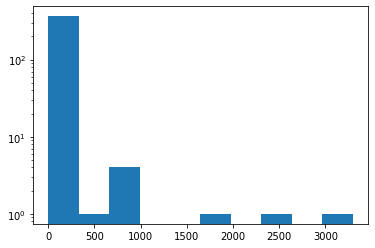

In [14]:
plt.hist(connections)
plt.yscale("log")
print(np.mean(connections))
print(np.median(connections))
print(np.min(connections))

In [15]:
#Only want threads with connecting members
connected = replies[replies.duplicated(subset=['MemberID'], keep=False)]

In [16]:
connected.head()

,﻿MessageID,ThreadID,ThreadName,MemberID,MemberName,Message,P_Year,P_Month,P_Day,P_Date,ThreadFirstMessageID
2,10004,1197,Latest Coalition Fatalities - Iraq/Afghanistan...,54,ANSAR 007,Iraq Office of the Assistant Secretary of Defe...,2009,04,22,2009-04-22 00:00:00.000,2051
3,10005,4031,Gunmen kill three Russian soldiers in Chechnya,932,Abu Fatima,As'Salaamu alaikum. Because the war is over an...,2009,04,22,2009-04-22 00:00:00.000,10005
4,10006,4032,More Pakistani cities fall into Taliban hand,54,ANSAR 007,More Pakistani cities fall into Taliban hand W...,2009,04,22,2009-04-22 00:00:00.000,10006
5,10007,4031,Gunmen kill three Russian soldiers in Chechnya,54,ANSAR 007,3 soldiers killed in Chechnya despite 'stabili...,2009,04,22,2009-04-22 00:00:00.000,10005
6,10008,4033,Jaish Abu Bakr al-Siddiqq al-Salafi: Bombing C...,12,Insurgent,بسم الله الرحمن الرحيم الحمد لله ناصر المؤمنين...,2009,04,22,2009-04-22 00:00:00.000,10008


In [17]:
connected.to_csv("Ansar1Clean.csv")